This notebook is to demonstrate cleaning
 of big data with pyspark


In [ ]:
!pip install pyspark

In [ ]:
import os




Mounted at /content/drive


In [ ]:
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
from pyspark.sql.functions import col, round, to_date
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
spark = SparkSession.builder \
    .appName("MySparkSession") \
    .getOrCreate()

Feature engineering
The process of using domain knowledge to create features

for all projects you need to Define goals, outputs and intended uses

You may need to explain what is and isn’t possible

First you must define the problem

For example for a house

For a given house with a listed price and attributes what is it likely to close for

We need to understand limitations
for example seasonality is limited without multiple years,we can only look at the grouping we gave I.e we can’t forecast on businesses if we have residential only


In [ ]:
# Return spark version
print(spark.version)

# Return python version
import sys
print(sys.version_info)

3.5.3
sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)


In [ ]:
df= spark.read.csv('2017_StPaul_MN_Real_Estate.csv', header=True)

In [ ]:
df = df.withColumnRenamed('No.', 'NO')

In [ ]:
# Use dtypes to check the data loads properly along with rows and columns

# Select our dependent variable
Y_df = df.select(['SALESCLOSEPRICE'])

# Display summary statistics
Y_df.describe().show()

+-------+------------------+
|summary|   SALESCLOSEPRICE|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998563|
|    min|            100000|
|    max|             99900|
+-------+------------------+



Let's suppose each month you get a new file. You know to expect a certain number of records and columns. In this exercise we will create a function that will validate the file loaded.

In [ ]:
# before generating features you hacve to validate data especially after transformations

def check_load(df, num_records, num_columns):
  # Takes a dataframe and compares record and column counts to input
  # Message to return if the critera below aren't met
  message = 'Validation Failed'
  # Check number of records
  if num_records == df.count():
    # Check number of columns
    if num_columns == len(df.columns):
      # Success message
      message = 'Validation Passed'
  return message


In [ ]:
# Print the data validation message
print(check_load(df, 5000, 74))


Validation Passed


In the age of data we have access to more attributes than we ever had before. To handle all of them we will build a lot of automation but at a minimum requires that their datatypes be correct.

In [ ]:
# Create list of actual dtypes to check
actual_dtypes_list = df.dtypes
print(actual_dtypes_list)

[('NO', 'string'), ('MLSID', 'string'), ('StreetNumberNumeric', 'string'), ('streetaddress', 'string'), ('STREETNAME', 'string'), ('PostalCode', 'string'), ('StateOrProvince', 'string'), ('City', 'string'), ('SalesClosePrice', 'string'), ('LISTDATE', 'string'), ('LISTPRICE', 'string'), ('LISTTYPE', 'string'), ('OriginalListPrice', 'string'), ('PricePerTSFT', 'string'), ('FOUNDATIONSIZE', 'string'), ('FENCE', 'string'), ('MapLetter', 'string'), ('LotSizeDimensions', 'string'), ('SchoolDistrictNumber', 'string'), ('DAYSONMARKET', 'string'), ('offmarketdate', 'string'), ('Fireplaces', 'string'), ('RoomArea4', 'string'), ('roomtype', 'string'), ('ROOF', 'string'), ('RoomFloor4', 'string'), ('PotentialShortSale', 'string'), ('PoolDescription', 'string'), ('PDOM', 'string'), ('GarageDescription', 'string'), ('SQFTABOVEGROUND', 'string'), ('Taxes', 'string'), ('RoomFloor1', 'string'), ('RoomArea1', 'string'), ('TAXWITHASSESSMENTS', 'string'), ('TAXYEAR', 'string'), ('LivingArea', 'string'), (

In [ ]:
validation_dict = {'AssociationFee': 'bigint', 'ASSESSMENTPENDING': 'string', 'AssumableMortgage': 'string', 'SQFTBELOWGROUND': 'bigint', 'AssessedValuation': 'double'}

In [ ]:
# Iterate through the list of actual dtypes tuples
for attribute_tuple in actual_dtypes_list:
  # Check if column name is dictionary of expected dtypes
  col_name = attribute_tuple[0]
  if col_name in validation_dict:

    # Compare attribute names and types
    col_type = attribute_tuple[1]
    if col_type == validation_dict[col_name]:
      print(col_name + ' has expected dtype.')

AssumableMortgage has expected dtype.
ASSESSMENTPENDING has expected dtype.


You need to understand the data its strengths weaknesses and limitations


Pyspark also has many other function

.mean(), / agg(‘col’ ,’mean’)
 .skewness()
.min
cov(col1, col2)  covariance takes 2 numeric columns to see how variables vary together

Using .collect() will trigger the function to see the result

df.cov(‘col1’,’col2’)

Plotting is also a great way to explore the data too however this can be time consuming as it needs to be converted back to an in memory source like pandas first

This is where sampling helps

df.sample(‘withReplacementBool’,fraction, seed)

pandas_df = df.toPandas()

Good plots are seaborne display and lmplot
Displot is a distribution plot and lmplot linearmodelplot allows for a quick view of a linear relationship between variables

# Full example:
spliit_df = df([])

split_df = split_df.sample(False,0.5,42) # With replacement set to false, 50% of the df and a seed of 42 for reproducibility



In [ ]:
from pyspark.sql.types import *

# Define a list of columns and their corresponding data types
schema = [
    ('NO', 'bigint'),
    ('MLSID', 'string'),
    ('StreetNumberNumeric', 'bigint'),
    ('streetaddress', 'string'),
    ('STREETNAME', 'string'),
    ('PostalCode', 'bigint'),
    ('StateOrProvince', 'string'),
    ('City', 'string'),
    ('SalesClosePrice', 'bigint'),
    ('LISTDATE', 'string'),
    ('LISTPRICE', 'bigint'),
    ('LISTTYPE', 'string'),
    ('OriginalListPrice', 'bigint'),
    ('PricePerTSFT', 'double'),
    ('FOUNDATIONSIZE', 'bigint'),
    ('FENCE', 'string'),
    ('MapLetter', 'string'),
    ('LotSizeDimensions', 'string'),
    ('SchoolDistrictNumber', 'string'),
    ('DAYSONMARKET', 'bigint'),
    ('offmarketdate', 'string'),
    ('Fireplaces', 'bigint'),
    ('RoomArea4', 'string'),
    ('roomtype', 'string'),
    ('ROOF', 'string'),
    ('RoomFloor4', 'string'),
    ('PotentialShortSale', 'string'),
    ('PoolDescription', 'string'),
    ('PDOM', 'bigint'),
    ('GarageDescription', 'string'),
    ('SQFTABOVEGROUND', 'bigint'),
    ('Taxes', 'bigint'),
    ('RoomFloor1', 'string'),
    ('RoomArea1', 'string'),
    ('TAXWITHASSESSMENTS', 'double'),
    ('TAXYEAR', 'bigint'),
    ('LivingArea', 'bigint'),
    ('UNITNUMBER', 'string'),
    ('YEARBUILT', 'bigint'),
    ('ZONING', 'string'),
    ('STYLE', 'string'),
    ('ACRES', 'double'),
    ('CoolingDescription', 'string'),
    ('APPLIANCES', 'string'),
    ('backonmarketdate', 'double'),
    ('ROOMFAMILYCHAR', 'string'),
    ('RoomArea3', 'string'),
    ('EXTERIOR', 'string'),
    ('RoomFloor3', 'string'),
    ('RoomFloor2', 'string'),
    ('RoomArea2', 'string'),
    ('DiningRoomDescription', 'string'),
    ('BASEMENT', 'string'),
    ('BathsFull', 'bigint'),
    ('BathsHalf', 'bigint'),
    ('BATHQUARTER', 'bigint'),
    ('BATHSTHREEQUARTER', 'double'),
    ('Class', 'string'),
    ('BATHSTOTAL', 'bigint'),
    ('BATHDESC', 'string'),
    ('RoomArea5', 'string'),
    ('RoomFloor5', 'string'),
    ('RoomArea6', 'string'),
    ('RoomFloor6', 'string'),
    ('RoomArea7', 'string'),
    ('RoomFloor7', 'string'),
    ('RoomArea8', 'string'),
    ('RoomFloor8', 'string'),
    ('Bedrooms', 'bigint'),
    ('SQFTBELOWGROUND', 'bigint'),
    ('AssumableMortgage', 'string'),
    ('AssociationFee', 'bigint'),
    ('ASSESSMENTPENDING', 'string'),
    ('AssessedValuation', 'double')
]



In [ ]:
missed = []
# Apply the schema to change column data types
for col_name, col_type in schema:
    # Cast each column to the appropriate type with backticks for special characters
    if col_name in df.columns:
        df = df.withColumn(f"`{col_name}`", df[col_name].cast(col_type))
    else:
        missed.append(col_name)

# Display any columns that were missed
if missed:
    print("Columns not found in DataFrame:", missed)


In [ ]:
df = df.withColumn("SalesClosePrice", col("SalesClosePrice").cast("int"))

In [ ]:
# # Name and value of col with max corr
# corr_max = 0
# corr_max_col = columns[0]

# # Loop to check all columns contained in list
# for col in columns:
#     # Check the correlation of a pair of columns
#     corr_val = df.corr('SALESCLOSEPRICE', col)
#     # Logic to compare corr_max with current corr_val
#     if corr_val > corr_max:
#         # Update the column name and corr value
#         corr_max = corr_val
#         corr_max_col = col

# print(corr_max_col)

<ipython-input-19-850cd069e44e>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pandas_df)


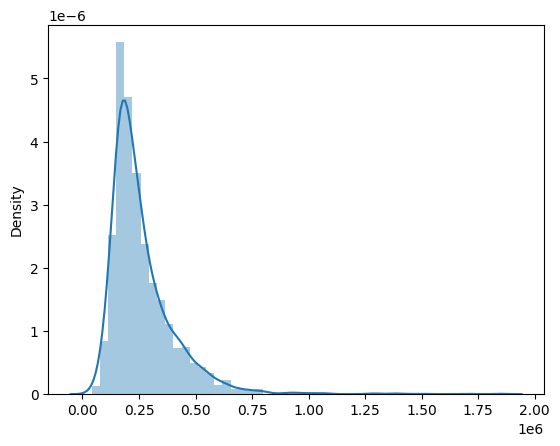

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a single column and sample and convert to pandas
sample_df = df.select(['LISTPRICE']).sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()

# Plot distribution of pandas_df and display plot
sns.distplot(pandas_df)
plt.show()

Understanding the distribution of our dependent variable is very important and can impact the type of model or preprocessing we do. A great way to do this is to plot it, however plotting is not a built in function in PySpark, we will need to take some intermediary steps to make sure it works correctly. In this exercise you will visualize the variable the 'LISTPRICE' variable, and you will gain more insights on its distribution by computing the skewness.

In [ ]:
# Import skewness function
from pyspark.sql.functions import skewness

# Compute and print skewness of LISTPRICE
print(df.agg({'LISTPRICE': 'skewness'}).collect())

[Row(skewness(LISTPRICE)=2.790448093916559)]


In [ ]:
# Select a the relevant columns and sample
sample_df = df.select(['SALESCLOSEPRICE', 'LIVINGAREA']).sample(False, 0.5, 42)
# Convert to pandas dataframe
pandas_df = sample_df.toPandas()

Creating linear model plots helps us visualize if variables have relationships with the dependent variable. If they do they are good candidates to include in our analysis. If they don't it doesn't mean that we should throw them out, it means we may have to process or wrangle them before they can be used.

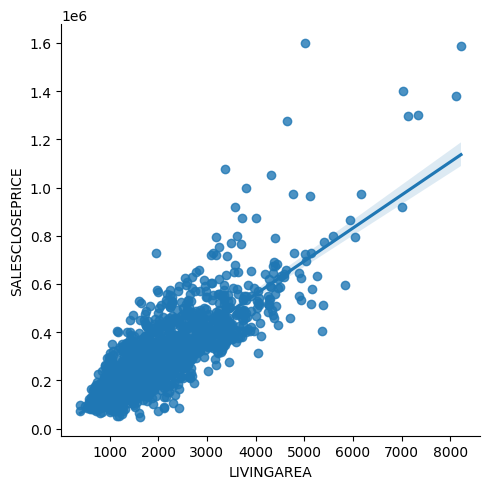

In [ ]:
# Convert to numeric
pandas_df['LIVINGAREA'] = pd.to_numeric(pandas_df['LIVINGAREA'], errors='coerce')
pandas_df['SALESCLOSEPRICE'] = pd.to_numeric(pandas_df['SALESCLOSEPRICE'], errors='coerce')

# Drop NaN values
pandas_df = pandas_df.dropna(subset=['LIVINGAREA', 'SALESCLOSEPRICE'])

# Create the plot
sns.lmplot(x='LIVINGAREA', y='SALESCLOSEPRICE', data=pandas_df)
plt.show()

When dropping data you cann do this multiple ways

To filter you can filter using standard sql such as like, where


For nearly normally distributed datasets filtering for outliers greater than 3 standard deviations away will help

std_val = df.agg({‘column’:’stddev’}).collect()[0][0]

mean_val = df.agg({‘column’:’mean’}).collect()[0][0]

hi_bound = mean_val + (3* std_val)
low_bound = mean_val - (3* std_val)

df = df.where((df[‘column’] < hi_bound) & (df[‘column’] > low_bound))


df.dropna()
how - any or all if any record is null or if all must be null
Thresh: int a threshold of non-null values
Subset: optional columns to consider

Example:

Df = df.dropna(how=‘all’,subset[‘col1’,’col2’])

df.droopna(thresh=2)

df.DropDuplicates() - to drop duplicates

In [ ]:
# Show top 30 records
df.show(30)

+---+-----+-------------------+--------------------+----------+----------+---------------+----------------+---------------+---------------+---------+---------------+-----------------+------------+--------------+----------------+---------+--------------------+--------------------+------------+---------------+----------+---------+--------------------+--------------------+----------+------------------+--------------------+----+--------------------+---------------+-----+----------+---------+------------------+-------+----------+----------+---------+--------------------+--------------------+-----+------------------+--------------------+----------------+--------------------+---------+--------------------+----------+----------+---------+---------------------+--------------------+---------+---------+-----------+-----------------+-----+----------+--------------------+---------+----------+---------+----------+---------+----------+---------+----------+--------+---------------+-----------------+--

Our data set is rich with a lot of features, but not all are valuable. We have many that are going to be hard to wrangle into anything useful. For now, let's remove any columns that aren't immediately useful by dropping them.

In [ ]:
# List of columns to remove from dataset
cols_to_drop = ['STREETNUMBERNUMERIC', 'LOTSIZEDIMENSIONS']

# Drop columns in list
df = df.drop(*cols_to_drop)

In [ ]:
# Inspect unique values in the column 'ASSUMABLEMORTGAGE'
df.select(['ASSUMABLEMORTGAGE']).distinct().show()

+-------------------+
|  ASSUMABLEMORTGAGE|
+-------------------+
|  Yes w/ Qualifying|
| Information Coming|
|Yes w/No Qualifying|
|      Not Assumable|
|               NULL|
+-------------------+



In [ ]:
# List of possible values containing 'yes'
yes_values = ['Yes w/ Qualifying', 'Yes w/No Qualifying']
# Filter the text values out of df but keep null values
text_filter = ~df['ASSUMABLEMORTGAGE'].isin(yes_values) | df['ASSUMABLEMORTGAGE'].isNull()
df = df.where(text_filter)
# print count of remaining records
print(df.count())

4976


Again, understanding the context of your data is extremely important. We want to understand what a normal range of houses sell for. Let's make sure we exclude any outlier homes that have sold for significantly more or less than the average. Here we will calculate the mean and standard deviation and use them to filer the near normal field log_SalesClosePrice.

(data whose distribution is mostly to the left). To correct negative skew (data mostly to the right) you need to take an extra step called "reflecting" before you can apply the inverse of , written as (1/) to make the data look more like normal a normal distribution. Reflecting data uses the following formula to reflect each value: .

In [ ]:
# You can apply log transformation to skewed data

from pyspark.sql.functions import log

df = df.withColumn('log_SalesClosePrice',log(df['SalesClosePrice']))

In [ ]:
from pyspark.sql.functions import mean, stddev

# Calculate values used for outlier filtering
mean_val = df.agg({'log_SalesClosePrice': 'mean'}).collect()[0][0]
stddev_val = df.agg({'log_SalesClosePrice': 'stddev'}).collect()[0][0]

In [ ]:
# Create three standard deviation (μ ± 3σ) lower and upper bounds for data
low_bound = mean_val - (3 * stddev_val)
hi_bound = mean_val + (3 * stddev_val)

# Filter the data to fit between the lower and upper bounds
df = df.filter((df['log_SalesClosePrice'] < hi_bound) & (df['log_SalesClosePrice'] > low_bound))


To help transform data you can use different opertions

One operation is min max scaling to bring all variables into the same scaling which is needed for many algorithms

scaled_value = (n - min )/ (max  - min)

Min = df.ag({‘column’: ‘min’}).collect()[0][0]
max = df.agg({‘column’:’min’}).collect()[0][0]

df = df.withColumn(“scaled_column”,(df[‘column’] - min)/ (max - min))


Standardisation / Z transformation : shifts data to normal distribution  with a mean of 0 and standard deviation of 1

mean_val = df.agg({‘column’: 'mean'}).collect()[0][0]
stddev_val = df.agg({‘column’: 'stddev'}).collect()[0][0]

df.withColumn(‘Ztranform’, (df[‘DAYSONMARKET’] - mean_val) / stdev_val)

To verify:
df.agg({‘Ztrans’:’stddev’).collect()

In [ ]:
df = df.withColumn('DAYSONMARKET', df['DAYSONMARKET'].cast('int'))
df = df.withColumn('FOUNDATIONSIZE', df['FOUNDATIONSIZE'].cast('int'))
df = df.withColumn('FIREPLACES', df['FIREPLACES'].cast('int'))
df = df.withColumn('YEARBUILT', df['YEARBUILT'].cast('int'))
df = df.withColumn('SalesClosePrice', df['SalesClosePrice'].cast('int'))
df = df.withColumn('ACRES', df['ACRES'].cast('double'))


In [ ]:
# Define max and min values and collect them
max_days = df.agg({'DAYSONMARKET': 'max'}).collect()[0][0]
min_days = df.agg({'DAYSONMARKET': 'min'}).collect()[0][0]
# Create a new column based off the scaled data
df = df.withColumn('percentagescaleddays',
                  round((df['DAYSONMARKET'] - min_days) / (max_days - min_days)) * 100)
# Calc max and min for new column
print(df.agg({'percentagescaleddays': 'max'}).show())
print(df.agg({'percentagescaleddays': 'min'}).show())

+-------------------------+
|max(percentagescaleddays)|
+-------------------------+
|                    100.0|
+-------------------------+

None
+-------------------------+
|min(percentagescaleddays)|
+-------------------------+
|                      0.0|
+-------------------------+

None


In [ ]:
def min_max_scaler(df, cols_to_scale):
  # Takes a dataframe and list of columns to minmax scale. Returns a dataframe.
  for col in cols_to_scale:
    # Define min and max values and collect them
    max_days = df.agg({col: 'max'}).collect()[0][0]
    min_days = df.agg({col: 'min'}).collect()[0][0]
    new_column_name = 'scaled_' + col
    # Create a new column based off the scaled data
    df = df.withColumn(new_column_name,
                      (df[col] - min_days) / (max_days - min_days))
  return df

In [ ]:
cols_to_scale = ['FOUNDATIONSIZE', 'DAYSONMARKET', 'FIREPLACES']
df = min_max_scaler(df, cols_to_scale)
# Show that our data is now between 0 and 1
df[['DAYSONMARKET', 'scaled_DAYSONMARKET']].show()

+------------+--------------------+
|DAYSONMARKET| scaled_DAYSONMARKET|
+------------+--------------------+
|          10|0.044444444444444446|
|           4|0.017777777777777778|
|          28| 0.12444444444444444|
|          19| 0.08444444444444445|
|          21| 0.09333333333333334|
|          17| 0.07555555555555556|
|          32| 0.14222222222222222|
|           5|0.022222222222222223|
|          23| 0.10222222222222223|
|          73|  0.3244444444444444|
|          80| 0.35555555555555557|
|          79|  0.3511111111111111|
|          12| 0.05333333333333334|
|           1|0.004444444444444...|
|          18|                0.08|
|           2|0.008888888888888889|
|          12| 0.05333333333333334|
|          45|                 0.2|
|          31| 0.13777777777777778|
|          16| 0.07111111111111111|
+------------+--------------------+
only showing top 20 rows



In [ ]:
# Compute the skewness
print(df.agg({'YEARBUILT': 'skewness'}).show())

+--------------------+
| skewness(YEARBUILT)|
+--------------------+
|-0.25317374723020336|
+--------------------+

None


In [ ]:
# Calculate the max year
max_year = df.agg({'YEARBUILT': 'max'}).collect()[0][0]

# Create a new column of reflected data
df = df.withColumn('Reflect_YearBuilt', (max_year + 1) - df['YEARBUILT'])

# Create a new column based reflected data
df = df.withColumn('adj_yearbuilt', 1 / log(df['Reflect_YearBuilt']))

Missing data:

Missing data can happen for many reasons
Data in missing formats, incorrect data types or intentional reasons

Missing at random is when the probability of missing data on the Y variable is unrelated to the value of Y

Example: if men are less likely to answer a survey  then missing data isn’t related to mental health but to Gender

Missing not at random is when it is missing and related for example people with health problems didn’t answer a health question


If your data has a few that are missing at random then dropna works

isNull().count()

You can also visualise them on a heat map

Rule based replacement

You can use mean or median If at random

Interpolate from another model

Any value replaced must be considered

Pyspark fillna(value, subset)

In [ ]:
# Sample the dataframe and convert to Pandas
columns = ['APPLIANCES',
 'BACKONMARKETDATE',
 'ROOMFAMILYCHAR',
 'BASEMENT',
 'DININGROOMDESCRIPTION']
sample_df = df.select(columns).sample(False, 0.1, 42)
pandas_df = sample_df.toPandas()

# Convert all values to T/F
tf_df = pandas_df.isnull()

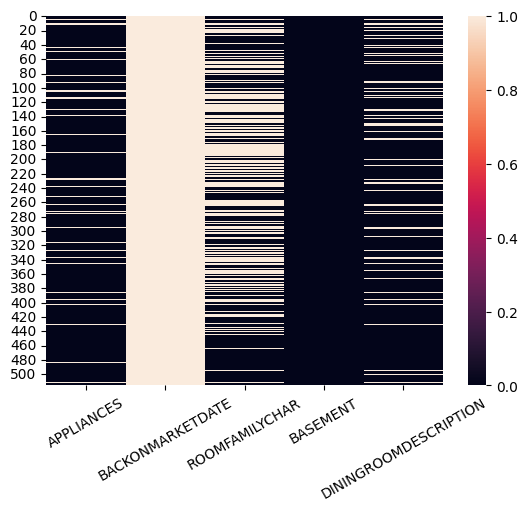

In [ ]:
# Plot it
sns.heatmap(data=tf_df)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()
# you can see a column that is completly empty

In [ ]:
# Count missing rows if thtr were any you could fill them with the average
missing = df.where(df['PDOM'].isNull()).count()
print(missing)

# Calculate the mean value
col_mean = df.agg({'PDOM': 'mean'}).collect()[0][0]

# Replacing with the mean value for that column
df.fillna(col_mean, subset=['PDOM'])

0


DataFrame[NO: string, MLSID: string, streetaddress: string, STREETNAME: string, PostalCode: string, StateOrProvince: string, City: string, SalesClosePrice: int, LISTDATE: string, LISTPRICE: string, LISTTYPE: string, OriginalListPrice: string, PricePerTSFT: string, FOUNDATIONSIZE: int, FENCE: string, MapLetter: string, SchoolDistrictNumber: string, DAYSONMARKET: int, offmarketdate: string, FIREPLACES: int, RoomArea4: string, roomtype: string, ROOF: string, RoomFloor4: string, PotentialShortSale: string, PoolDescription: string, PDOM: string, GarageDescription: string, SQFTABOVEGROUND: string, Taxes: string, RoomFloor1: string, RoomArea1: string, TAXWITHASSESSMENTS: string, TAXYEAR: string, LivingArea: string, UNITNUMBER: string, YEARBUILT: int, ZONING: string, STYLE: string, ACRES: double, CoolingDescription: string, APPLIANCES: string, backonmarketdate: string, ROOMFAMILYCHAR: string, RoomArea3: string, EXTERIOR: string, RoomFloor3: string, RoomFloor2: string, RoomArea2: string, Dining

In [ ]:
from pyspark.sql import functions as F

def column_dropper(df, threshold):
    # Count total records in the DataFrame
    total_records = df.count()

    # Initialize a list to hold columns to drop
    columns_to_drop = []

    for col_name in df.columns:
        # Calculate the percentage of missing values
        missing_count = df.filter(F.col(col_name).isNull()).count()
        missing_percent = missing_count / total_records

        # Add column to drop list if it exceeds the threshold
        if missing_percent > threshold:
            columns_to_drop.append(col_name)

    # Drop all columns that exceed the threshold
    df = df.drop(*columns_to_drop)
    return df

# Drop columns with more than 90% missing values
df = column_dropper(df, 0.9)


In [ ]:
housing_df = df
# temporary name change for example below

External data can add extra features but too many features may harm the model

It can be used to replace missing or aggregated data

Data leakage can also be an issue - this is leaking information from the future which wouldn’t be handled

Cost to obtain



Pyspakr has 2 ways to join data

Df.join(df2, on=‘key to join’, how=‘type of join’)

Condition = [df[‘column’] == df2[‘column’]]
df = df.join(df2,on=condition ,’left’)


df.where(~df[‘column’].isNull()).count()
#count the non empty

Alternate join:

Spark sql allows you to use sql commands

df.createOrReplaceTempView(“df1”)
Df2.createOrReplaceTempview(“df2”)

sql_df = spark.sql(“””
			SELECT * FROM df1
			LEFT JOIN df2
			ON df.column = df2.column
			“””)


# Cast data types
walk_df = walk_df.withColumn('longitude', walk_df['longitude'].cast('double'))
walk_df = walk_df.withColumn('latitude', walk_df['latitude'].cast('double'))

# Round precision
df = df.withColumn('longitude', round(df['longitude'], 5))
df = df.withColumn('latitude', round(df['latitude'], 5))

# Create join condition
condition = [walk_df['latitude'] == df['latitude'], walk_df['longitude'] == df['longitude']]

# Join the dataframes together
join_df = walk_df.join(df, on=condition, how='left')
# Count non-null records from new field
print(join_df.where(~join_df['walkscore'].isNull()).count())


# Register dataframes as tables
df.createOrReplaceTempView('df')
walk_df.createOrReplaceTempView('walk_df')

# SQL to join dataframes
join_sql =  """
            SELECT
                *
            FROM df
            LEFT JOIN walk_df
            ON df.longitude = walk_df.longitude
            AND df.latitude = walk_df.latitude
            """
# Perform sql join
joined_df = spark.sql(join_sql)


Joins can go bad silently if we are not careful, meaning they will not error out but instead return mangled data with more or less data than you'd intended. Let's take a look at a couple ways that joining incorrectly can change your data set for the worse.

In [ ]:
import random


# Create fake data for df and walk_df
data_df = [
    (1, 40.7128 + random.uniform(-0.01, 0.01), -74.0060 + random.uniform(-0.01, 0.01), 500000),
    (2, 34.0522 + random.uniform(-0.01, 0.01), -118.2437 + random.uniform(-0.01, 0.01), 300000),
    (3, 41.8781 + random.uniform(-0.01, 0.01), -87.6298 + random.uniform(-0.01, 0.01), 200000),
]
columns_df = ["id", "latitude", "longitude", "price"]
df = spark.createDataFrame(data_df, columns_df)

data_walk_df = [
    (1, 40.7128, -74.0060, 85),
    (2, 34.0522, -118.2437, 75),
    (3, 41.8781, -87.6298, 65),
]
columns_walk_df = ["id", "latitude", "longitude", "walkscore"]
walk_df = spark.createDataFrame(data_walk_df, columns_walk_df)

# Show data
print("df:")
df.show()
print("walk_df:")
walk_df.show()

df:
+---+------------------+-------------------+------+
| id|          latitude|          longitude| price|
+---+------------------+-------------------+------+
|  1| 40.72052799520548|   -74.012846631228|500000|
|  2|  34.0576754948479|-118.24389751839219|300000|
|  3|41.875523067515324| -87.62151933823445|200000|
+---+------------------+-------------------+------+

walk_df:
+---+--------+---------+---------+
| id|latitude|longitude|walkscore|
+---+--------+---------+---------+
|  1| 40.7128|  -74.006|       85|
|  2| 34.0522|-118.2437|       75|
|  3| 41.8781| -87.6298|       65|
+---+--------+---------+---------+



In [ ]:
# Cast columns
walk_df = walk_df.withColumn('longitude', walk_df['longitude'].cast('double'))
walk_df = walk_df.withColumn('latitude', walk_df['latitude'].cast('double'))

# Round to five decimal places
df = df.withColumn('longitude', round(df['longitude'], 5))
df = df.withColumn('latitude', round(df['latitude'], 5))


In [ ]:
# Create join condition
condition = [walk_df['latitude'] == df['latitude'], walk_df['longitude'] == df['longitude']]

# Perform the join
join_df = df.join(walk_df, on=condition, how='left')
print("Joined DataFrame:")
join_df.show()

# Count non-null records in the joined column
print("Non-null walkscore count:", join_df.where(~join_df['walkscore'].isNull()).count())


Joined DataFrame:
+---+--------+---------+------+----+--------+---------+---------+
| id|latitude|longitude| price|  id|latitude|longitude|walkscore|
+---+--------+---------+------+----+--------+---------+---------+
|  1|40.72053|-74.01285|500000|NULL|    NULL|     NULL|     NULL|
|  3|41.87552|-87.62152|200000|NULL|    NULL|     NULL|     NULL|
|  2|34.05768|-118.2439|300000|NULL|    NULL|     NULL|     NULL|
+---+--------+---------+------+----+--------+---------+---------+

Non-null walkscore count: 0


In [ ]:
# Register the DataFrames as SQL tables
df.createOrReplaceTempView("df")
walk_df.createOrReplaceTempView("walk_df")

# SQL join
join_sql = """
            SELECT
                df.*,
                walk_df.walkscore
            FROM df
            LEFT JOIN walk_df
            ON df.latitude = walk_df.latitude
            AND df.longitude = walk_df.longitude
            """
joined_df = spark.sql(join_sql)
print("Joined DataFrame using SQL:")
joined_df.show()


Joined DataFrame using SQL:
+---+--------+---------+------+---------+
| id|latitude|longitude| price|walkscore|
+---+--------+---------+------+---------+
|  1|40.72053|-74.01285|500000|     NULL|
|  3|41.87552|-87.62152|200000|     NULL|
|  2|34.05768|-118.2439|300000|     NULL|
+---+--------+---------+------+---------+



Step 4: Pitfalls of Incorrect Joins
(a) Mismatched Key Precision
If we join with keys that don’t match precisely (e.g., due to floating-point differences), it can lead to NULL values where there should be matches.

In [ ]:
# Example of a join with slight mismatches due to precision issues
wrong_prec_cond = [df['longitude'] == walk_df['longitude'], df['latitude'] == walk_df['latitude']]
wrong_prec_df = df.join(walk_df, on=wrong_prec_cond, how='left')
print("Count of NULL walkscore values in wrong precision join:", wrong_prec_df.where(wrong_prec_df['walkscore'].isNull()).count())


Count of NULL walkscore values in wrong precision join: 3


(b) Joining on Too Few Keys
If we only join on longitude and ignore latitude, we might get incorrect matches, as multiple records can share the same longitude.

In [ ]:
# Example of join on too few keys
few_keys_cond = [df['longitude'] == walk_df['longitude']]
few_keys_df = df.join(walk_df, on=few_keys_cond, how='left')
print("Record Count of the Too Few Keys Join Example:", few_keys_df.count())
print("Record Count of the Correct Join Example:", join_df.count())


Record Count of the Too Few Keys Join Example: 3
Record Count of the Correct Join Example: 3


With features that are highly correlated someitmes it helps to join them for example:

In [ ]:
# Adding fake 'length' and 'width' columns
df = df.withColumn("length", (col("latitude") * 100).cast("int"))
df = df.withColumn("width", (col("longitude") * 100).cast("int"))

# Create new feature by combining length and width
df = df.withColumn("area", col("length") * col("width"))
print("DataFrame with combined features:")
df.select("id", "latitude", "longitude", "length", "width", "area").show()


DataFrame with combined features:
+---+--------+---------+------+------+---------+
| id|latitude|longitude|length| width|     area|
+---+--------+---------+------+------+---------+
|  1|40.72053|-74.01285|  4072| -7401|-30136872|
|  2|34.05768|-118.2439|  3405|-11824|-40260720|
|  3|41.87552|-87.62152|  4187| -8762|-36686494|
+---+--------+---------+------+------+---------+



In [ ]:
#  pulll back in housing df to continue our example:
df = housing_df

In [ ]:
df.show(5)

+---+-----+--------------------+----------+----------+---------------+----------------+---------------+--------------+---------+---------------+-----------------+------------+--------------+----------+---------+--------------------+------------+---------------+----------+---------+--------------------+--------------------+----------+------------------+---------------+----+--------------------+---------------+-----+----------+---------+------------------+-------+----------+----------+---------+------------------+--------------------+-----+------------------+--------------------+--------------+---------+------------+----------+----------+---------+---------------------+--------------------+---------+---------+-----------+-----------------+-----+----------+--------------------+---------+----------+---------+----------+---------+----------+---------+----------+--------+---------------+-----------------+--------------+-----------------+-----------------+----+-------+---------------------+--

In [ ]:
# Lot size in square feet
acres_to_sqfeet = 43560
df = df.withColumn("LOT_SIZE_SQFT", df['ACRES'] * acres_to_sqfeet)

# Create new column YARD_SIZE
df = df.withColumn('YARD_SIZE', df['LOT_SIZE_SQFT'] - df['FOUNDATIONSIZE'])

# Corr of ACRES vs SalesClosePrice
print("Corr of ACRES vs SalesClosePrice: " + str(df.corr("ACRES", "SalesClosePrice")))
# Corr of FOUNDATIONSIZE vs SalesClosePrice
print("Corr of FOUNDATIONSIZE vs SalesClosePrice: " + str(df.corr("FOUNDATIONSIZE", "SalesClosePrice")))
# Corr of YARD_SIZE vs SalesClosePrice
print("Corr of YARD_SIZE vs SalesClosePrice: " + str(df.corr("YARD_SIZE", "SalesClosePrice")))
# Corr of LOT_SIZE_SQFT vs SalesClosePrice
print("Corr of LOT_SIZE_SQFT vs SalesClosePrice: " + str(df.corr("LOT_SIZE_SQFT", "SalesClosePrice")))





Corr of ACRES vs SalesClosePrice: 0.2130819260750225
Corr of FOUNDATIONSIZE vs SalesClosePrice: 0.5976957088401492
Corr of YARD_SIZE vs SalesClosePrice: 0.20032633979612804
Corr of LOT_SIZE_SQFT vs SalesClosePrice: 0.21308192607502127


In [ ]:
# ASSESSED_TO_LIST
df = df.withColumn('ASSESSED_TO_LIST', df['ASSESSEDVALUATION'] / df['LISTPRICE']
)
df[['ASSESSEDVALUATION', 'LISTPRICE', 'ASSESSED_TO_LIST']].show(5)
# TAX_TO_LIST
df = df.withColumn('TAX_TO_LIST', df['TAXES'] / df['LISTPRICE']
)
df[['TAX_TO_LIST', 'TAXES', 'LISTPRICE']].show(5)
# BED_TO_BATHS
df = df.withColumn('BED_TO_BATHS', df['BEDROOMS'] / df['BATHSTOTAL']
)
df[['BED_TO_BATHS', 'BEDROOMS', 'BATHSTOTAL']].show(5)


+-----------------+---------+----------------+
|ASSESSEDVALUATION|LISTPRICE|ASSESSED_TO_LIST|
+-----------------+---------+----------------+
|                0|   139900|             0.0|
|                0|   210000|             0.0|
|                0|   225000|             0.0|
|                0|   230000|             0.0|
|                0|   239900|             0.0|
+-----------------+---------+----------------+
only showing top 5 rows

+--------------------+-----+---------+
|         TAX_TO_LIST|TAXES|LISTPRICE|
+--------------------+-----+---------+
|0.013280914939242315| 1858|   139900|
| 0.00780952380952381| 1640|   210000|
|0.010622222222222222| 2390|   225000|
|0.009330434782608695| 2146|   230000|
|0.008378491037932471| 2010|   239900|
+--------------------+-----+---------+
only showing top 5 rows

+------------------+--------+----------+
|      BED_TO_BATHS|BEDROOMS|BATHSTOTAL|
+------------------+--------+----------+
|               1.5|       3|         2|
|1.333333333

+-------+-------------------+
|summary| BATHS_PER_1000SQFT|
+-------+-------------------+
|  count|               4946|
|   mean| 1.4339460530042523|
| stddev| 14.205761576339642|
|    min|0.39123630672926446|
|    max|             1000.0|
+-------+-------------------+



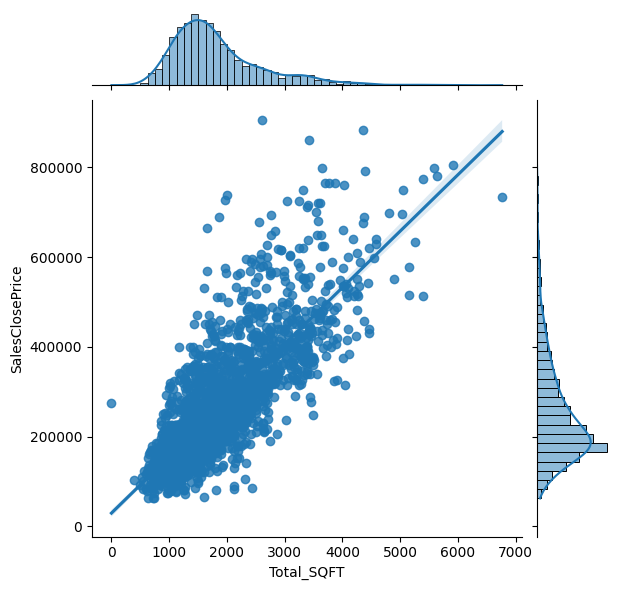

In [ ]:
# Create new feature by adding two features together
df = df.withColumn('Total_SQFT', df['SQFTBELOWGROUND'] + df['SQFTABOVEGROUND'])

# Create additional new feature using previously created feature
df = df.withColumn('BATHS_PER_1000SQFT', df['BATHSTOTAL'] / (df['Total_SQFT'] / 1000))
df[['BATHS_PER_1000SQFT']].describe().show()

# Pandas dataframe
pandas_df = df.sample(False, 0.5, 0).toPandas()

# Linear model plots
sns.jointplot(x='Total_SQFT', y='SalesClosePrice', data=pandas_df, kind="reg")
plt.show()

Building the correct features is important when dealing with time, daily weekly yearly seasonally depending on the data depends on the interval

for example shop sales may look at sales by day and hour

more infrequent sales may look at day, week or even month for seasonality

in spark you can use to_date or to_timestamp depending if you require time or just date information

In [ ]:
from pyspark.sql.functions import to_date, dayofweek

In [ ]:
df = df.withColumn('offmarketdate', to_date(df['offmarketdate']))
df = df.withColumn('LISTDATE', to_date(df['LISTDATE']))
df = df.withColumn('offmarketdate', to_date(df['offmarketdate']))
df = df.withColumn('List_Day_of_Week', dayofweek('LISTDATE'))

one way to handle date components is ot make them ordinal I.E. using year and or month, and or weekofyear or dayofmonth

you can use datediff to calculate the difference between dates for example the days on the market which can indicate property issues or lack of interest

Lagging time features is a very common approach to add propagation time for a variables effect to impact the outcome.

to do this you will need the following:

a window() function which returns a value for each record based of a groupof records

lag returns the value that is offset by the rows before


an example of this would bemortgage rates changing and then the ffect this would have on hosuing prices



In [ ]:
# an example that wont work due to laack of data but an example
# # Create year column
# df = df.withColumn('list_year', year('LISTDATE'))

# # Adjust year to match
# df = df.withColumn('report_year', (df['list_year'] - 1))

# # Create join condition
# condition = [df['CITY'] == price_df['City'], df['report_year'] == price_df['Year']]

# # Join the dataframes together
# df = df.join(price_df, on=condition, how='left')
# # Inspect that new columns are available
# df[['MedianHomeValue']].show()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType, StringType, FloatType, StructType, StructField

# Initialize Spark session
spark = SparkSession.builder.master("local").appName("LaggingDataExample").getOrCreate()

# Define schema for house price and mortgage rate data
schema = StructType([
    StructField("City", StringType(), True),
    StructField("Year", IntegerType(), True),
    StructField("MedianHomePrice", FloatType(), True),
    StructField("MortgageRate", FloatType(), True)
])

# Generate fake data for house prices and mortgage rates
data = [
    ("New York", 2018, 520000.0, 4.5),
    ("New York", 2019, 540000.0, 4.0),
    ("New York", 2020, 560000.0, 3.5),
    ("New York", 2021, 590000.0, 3.0),
    ("New York", 2022, 620000.0, 3.7),
    ("Los Angeles", 2018, 700000.0, 4.5),
    ("Los Angeles", 2019, 730000.0, 4.0),
    ("Los Angeles", 2020, 750000.0, 3.5),
    ("Los Angeles", 2021, 770000.0, 3.0),
    ("Los Angeles", 2022, 800000.0, 3.7),
    ("Chicago", 2018, 300000.0, 4.5),
    ("Chicago", 2019, 310000.0, 4.0),
    ("Chicago", 2020, 320000.0, 3.5),
    ("Chicago", 2021, 340000.0, 3.0),
    ("Chicago", 2022, 360000.0, 3.7)
]

# Create DataFrame
house_price_df = spark.createDataFrame(data, schema)

# Show the data
house_price_df.show()


+-----------+----+---------------+------------+
|       City|Year|MedianHomePrice|MortgageRate|
+-----------+----+---------------+------------+
|   New York|2018|       520000.0|         4.5|
|   New York|2019|       540000.0|         4.0|
|   New York|2020|       560000.0|         3.5|
|   New York|2021|       590000.0|         3.0|
|   New York|2022|       620000.0|         3.7|
|Los Angeles|2018|       700000.0|         4.5|
|Los Angeles|2019|       730000.0|         4.0|
|Los Angeles|2020|       750000.0|         3.5|
|Los Angeles|2021|       770000.0|         3.0|
|Los Angeles|2022|       800000.0|         3.7|
|    Chicago|2018|       300000.0|         4.5|
|    Chicago|2019|       310000.0|         4.0|
|    Chicago|2020|       320000.0|         3.5|
|    Chicago|2021|       340000.0|         3.0|
|    Chicago|2022|       360000.0|         3.7|
+-----------+----+---------------+------------+



In [ ]:
from pyspark.sql import Window
from pyspark.sql.functions import lag

# Define a window specification by City, ordered by Year
window_spec = Window.partitionBy("City").orderBy("Year")

# Create a lagged column for the MortgageRate by 1 year
house_price_df = house_price_df.withColumn("PreviousYearMortgageRate", lag("MortgageRate", 1).over(window_spec))

# Show the DataFrame with the lagged mortgage rate
house_price_df.select("City", "Year", "MedianHomePrice", "MortgageRate", "PreviousYearMortgageRate").show()


+-----------+----+---------------+------------+------------------------+
|       City|Year|MedianHomePrice|MortgageRate|PreviousYearMortgageRate|
+-----------+----+---------------+------------+------------------------+
|    Chicago|2018|       300000.0|         4.5|                    NULL|
|    Chicago|2019|       310000.0|         4.0|                     4.5|
|    Chicago|2020|       320000.0|         3.5|                     4.0|
|    Chicago|2021|       340000.0|         3.0|                     3.5|
|    Chicago|2022|       360000.0|         3.7|                     3.0|
|Los Angeles|2018|       700000.0|         4.5|                    NULL|
|Los Angeles|2019|       730000.0|         4.0|                     4.5|
|Los Angeles|2020|       750000.0|         3.5|                     4.0|
|Los Angeles|2021|       770000.0|         3.0|                     3.5|
|Los Angeles|2022|       800000.0|         3.7|                     3.0|
|   New York|2018|       520000.0|         4.5|    

In [ ]:
# Calculate correlation
correlation = house_price_df.stat.corr("PreviousYearMortgageRate", "MedianHomePrice")
print(f"Correlation between Previous Year's Mortgage Rate and Median Home Price: {correlation}")


Correlation between Previous Year's Mortgage Rate and Median Home Price: 0.06933613724851492


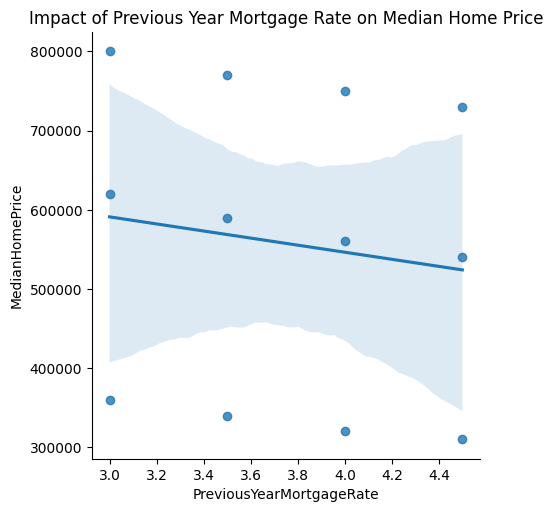

In [ ]:
# Convert to Pandas DataFrame
pandas_df = house_price_df.toPandas()

# Plot Previous Year Mortgage Rate vs. Median Home Price
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x="PreviousYearMortgageRate", y="MedianHomePrice", data=pandas_df)
plt.title("Impact of Previous Year Mortgage Rate on Median Home Price")
plt.show()


In [ ]:
# from pyspark.sql.functions import lag, datediff, to_date
# from pyspark.sql.window import Window

# # Cast data type
# mort_df = mort_df.withColumn('DATE', to_date('DATE'))

# # Create window
# w = Window().orderBy(mort_df['DATE'])
# # Create lag column
# mort_df = mort_df.withColumn('DATE-1', lag('DATE', count=1).over(w))

# # Calculate difference between date columns
# mort_df = mort_df.withColumn('Days_Between_Report', datediff('DATE', 'DATE-1'))
# # Print results
# mort_df.select('Days_Between_Report').distinct().show()

In [ ]:
df.select('GARAGEDESCRIPTION').show(5)

+--------------------+
|   GARAGEDESCRIPTION|
+--------------------+
|     Attached Garage|
|Attached Garage, ...|
|     Attached Garage|
|Attached Garage, ...|
|Attached Garage, ...|
+--------------------+
only showing top 5 rows



In [ ]:
# Import needed functions
from pyspark.sql.functions import when

# Create boolean conditions for string matches
has_attached_garage = df['GARAGEDESCRIPTION'].like('%Attached Garage%')
has_detached_garage = df['GARAGEDESCRIPTION'].like('%Detached Garage%')

# Conditional value assignment
df = df.withColumn('has_attached_garage', (when(has_attached_garage, 1)
                                          .when(has_detached_garage, 0)
                                          .otherwise(None)))

# Inspect results
df[['GARAGEDESCRIPTION', 'has_attached_garage']].show(truncate=100)

+------------------------------------------------------------------+-------------------+
|                                                 GARAGEDESCRIPTION|has_attached_garage|
+------------------------------------------------------------------+-------------------+
|                                                   Attached Garage|                  1|
|           Attached Garage, Driveway - Asphalt, Garage Door Opener|                  1|
|                                                   Attached Garage|                  1|
|    Attached Garage, Detached Garage, Tuckunder, Driveway - Gravel|                  1|
|           Attached Garage, Driveway - Asphalt, Garage Door Opener|                  1|
|                               Attached Garage, Driveway - Asphalt|                  1|
|           Attached Garage, Driveway - Asphalt, Garage Door Opener|                  1|
|                                                   Attached Garage|                  1|
|                    

In [ ]:
# Import needed functions
from pyspark.sql.functions import split, explode

# Convert string to list-like array
df = df.withColumn('garage_list', split(df['GARAGEDESCRIPTION'], ', '))

# Explode the values into new records
ex_df = df.withColumn('ex_garage_list', explode(df['garage_list']))

# Inspect the values
ex_df[['ex_garage_list']].distinct().show(100, truncate=50)

+----------------------------+
|              ex_garage_list|
+----------------------------+
|             Attached Garage|
|      On-Street Parking Only|
|                        None|
| More Parking Onsite for Fee|
|          Garage Door Opener|
|   No Int Access to Dwelling|
|           Driveway - Gravel|
|       Valet Parking for Fee|
|              Uncovered/Open|
|               Heated Garage|
|          Underground Garage|
|                       Other|
|                  Unassigned|
|More Parking Offsite for Fee|
|    Driveway - Other Surface|
|       Contract Pkg Required|
|                     Carport|
|                     Secured|
|             Detached Garage|
|          Driveway - Asphalt|
|                  Units Vary|
|                    Assigned|
|                   Tuckunder|
|                     Covered|
|            Insulated Garage|
|         Driveway - Concrete|
|                      Tandem|
|           Driveway - Shared|
+----------------------------+



In [ ]:
# from pyspark.sql.functions import coalesce, first

# # Pivot
# piv_df = ex_df.groupBy('NO').pivot('ex_garage_list').agg(coalesce(first('constant_val')))

# # Join the dataframes together and fill null
# joined_df = df.join(piv_df, on='NO', how='left')

# # Columns to zero fill
# zfill_cols = piv_df.columns

# # Zero fill the pivoted values
# zfilled_df = joined_df.fillna(0, subset=zfill_cols)

Binarisation of features is a way to collapse features into yes or no features given a threshold

this can be has fireplaces or has en suite etc

the column must be of type double

In [ ]:
from pyspark.ml.feature import Binarizer

df = df.withColumn('FIREPLACES', df['FIREPLACES'].cast('double'))

binarise = Binarizer(threshold=0.0,inputCol='FIREPLACES', outputCol='has_fireplaces')
df = binarise.transform(df)
df[['FIREPLACES', 'has_fireplaces']].show(5)


+----------+--------------+
|FIREPLACES|has_fireplaces|
+----------+--------------+
|       0.0|           0.0|
|       0.0|           0.0|
|       0.0|           0.0|
|       1.0|           1.0|
|       1.0|           1.0|
+----------+--------------+
only showing top 5 rows



bucketing is where you group ordnial variables like binning

In [ ]:
from pyspark.ml.feature import Bucketizer
splits = [0,1,2,3,4,float('Inf')]
df = df.withColumn('BATHSTOTAL', df['BATHSTOTAL'].cast('double'))
bucketise = Bucketizer(splits=splits, inputCol='BATHSTOTAL', outputCol='baths')
df = bucketise.transform(df)
df[['BATHSTOTAL', 'baths']].show(5)

+----------+-----+
|BATHSTOTAL|baths|
+----------+-----+
|       2.0|  2.0|
|       3.0|  3.0|
|       1.0|  1.0|
|       2.0|  2.0|
|       2.0|  2.0|
+----------+-----+
only showing top 5 rows



one hot encoding allows each categorical value to be pivoted to columns of their own of bool value

In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.sql.functions import to_timestamp

# Create a StringIndexer
stringIndexer = StringIndexer(inputCol='City', outputCol='City_Index')

# Fit the StringIndexer and transform the DataFrame
model = stringIndexer.fit(df)
indexed = model.transform(df)

# Create a OneHotEncoder
encoder = OneHotEncoder(inputCols=['City_Index'], outputCols=['City_Vec'])

# Fit the OneHotEncoder on the 'indexed' DataFrame and transform it
# Note: We are fitting and transforming in a single step using fit.transform
encodeddf = encoder.fit(indexed).transform(indexed)

# Show the results
encodeddf[['City', 'City_Index', 'City_Vec']].show(5)

+----------------+----------+---------+
|            City|City_Index| City_Vec|
+----------------+----------+---------+
|LELM - Lake Elmo|       4.0|(4,[],[])|
|LELM - Lake Elmo|       4.0|(4,[],[])|
|LELM - Lake Elmo|       4.0|(4,[],[])|
|LELM - Lake Elmo|       4.0|(4,[],[])|
|LELM - Lake Elmo|       4.0|(4,[],[])|
+----------------+----------+---------+
only showing top 5 rows



In [ ]:
df = housing_df

In [ ]:
from pyspark.sql.functions import to_date, dayofweek, to_timestamp
from pyspark.sql import SparkSession

# Drop rows with null LISTDATE
df = df.filter(df['LISTDATE'].isNotNull())

# Convert LISTDATE to a timestamp using the correct format
df = df.withColumn('LISTDATE', to_timestamp(df['LISTDATE'], 'M/d/yyyy H:mm'))  # Specify the format

temp_df = df.withColumn('LISTDATE', to_date(df['LISTDATE']))  # Adjust the format as necessary

temp_df = temp_df.withColumn('List_Day_of_Week', dayofweek('LISTDATE'))

# Verify transformation
temp_df[['List_Day_of_Week','LISTDATE']].show(5)

+----------------+----------+
|List_Day_of_Week|  LISTDATE|
+----------------+----------+
|               7|2017-07-15|
|               2|2017-10-09|
|               2|2017-06-26|
|               6|2017-08-25|
|               3|2017-09-12|
+----------------+----------+
only showing top 5 rows



In [ ]:

# Drop rows with null LISTDATE
df = df.filter(df['LISTDATE'].isNotNull())

# Convert LISTDATE to a timestamp using the correct format
df = df.withColumn('LISTDATE', to_timestamp(df['LISTDATE'], 'M/d/yyyy H:mm'))  # Specify the format

# Create List_Day_of_Week directly from LISTDATE
df = df.withColumn('List_Day_of_Week', dayofweek('LISTDATE'))

# Verify transformation
df.select('LISTDATE', 'List_Day_of_Week').show(truncate=False)


+-------------------+----------------+
|LISTDATE           |List_Day_of_Week|
+-------------------+----------------+
|2017-07-15 00:00:00|7               |
|2017-10-09 00:00:00|2               |
|2017-06-26 00:00:00|2               |
|2017-08-25 00:00:00|6               |
|2017-09-12 00:00:00|3               |
|2017-04-10 00:00:00|2               |
|2017-06-08 00:00:00|5               |
|2017-11-05 00:00:00|1               |
|2017-10-12 00:00:00|5               |
|2017-09-02 00:00:00|7               |
|2017-05-19 00:00:00|6               |
|2017-05-11 00:00:00|5               |
|2017-03-12 00:00:00|1               |
|2017-03-06 00:00:00|2               |
|2017-05-18 00:00:00|5               |
|2017-10-15 00:00:00|1               |
|2017-09-10 00:00:00|1               |
|2017-09-01 00:00:00|6               |
|2017-05-06 00:00:00|7               |
|2017-08-11 00:00:00|6               |
+-------------------+----------------+
only showing top 20 rows



In [ ]:
df = df.withColumn('Bedrooms', df['Bedrooms'].cast('double'))

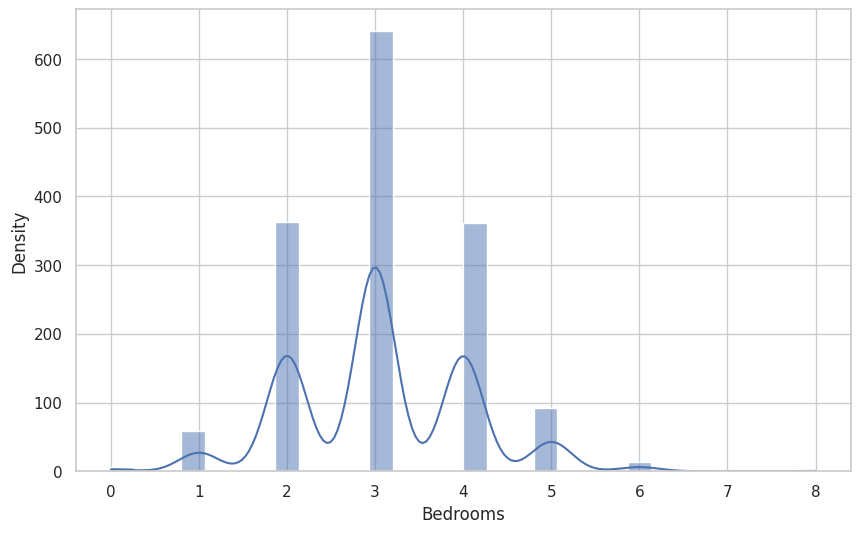

In [ ]:
# Sample 30% of the DataFrame, with seed 42 for reproducibility
sample_df = df.sample(False, 0.3, 42)

# Convert the sampled DataFrame to Pandas DataFrame
pandas_df = sample_df.toPandas()

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a histogram and KDE plot for the BASEMENT column
plt.figure(figsize=(10, 6))  # Set figure size
sns.histplot(pandas_df['Bedrooms'], kde=True, bins=30)  # KDE for the density curve
plt.xlabel('Bedrooms')  # X-axis label
plt.ylabel('Density')    # Y-axis label
plt.show()


In [ ]:
from pyspark.ml.feature import Bucketizer
# Create the bucket splits and bucketizer
splits = [0, 1, 2, 3, 4, 5, float('Inf')]
buck = Bucketizer(splits=splits, inputCol='Bedrooms', outputCol='bedroom')

# Apply the transformation to df: df_bucket
df_bucket = buck.transform(df)

# Display results
df_bucket[['Bedrooms', 'bedroom']].show()

+--------+-------+
|Bedrooms|bedroom|
+--------+-------+
|     3.0|    3.0|
|     4.0|    4.0|
|     2.0|    2.0|
|     2.0|    2.0|
|     3.0|    3.0|
|     3.0|    3.0|
|     3.0|    3.0|
|     3.0|    3.0|
|     3.0|    3.0|
|     3.0|    3.0|
|     3.0|    3.0|
|     3.0|    3.0|
|     3.0|    3.0|
|     3.0|    3.0|
|     2.0|    2.0|
|     3.0|    3.0|
|     3.0|    3.0|
|     3.0|    3.0|
|     3.0|    3.0|
|     3.0|    3.0|
+--------+-------+
only showing top 20 rows



In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

# Map strings to numbers with string indexer
string_indexer = StringIndexer(inputCol='SchoolDistrictNumber', outputCol='School_Index')
indexed_df = string_indexer.fit(df).transform(df)

# Onehot encode indexed values
encoder = OneHotEncoder(inputCols=['School_Index'], outputCols=['School_Vec']) # Update inputCols/outputCols to lists
encoded_df = encoder.fit(indexed_df).transform(indexed_df) # fit then transform are required for older versions

# Inspect the transformation steps
encoded_df[['SchoolDistrictNumber', 'School_Index', 'School_Vec']].show(truncate=100)

+-----------------------------+------------+-------------+
|         SchoolDistrictNumber|School_Index|   School_Vec|
+-----------------------------+------------+-------------+
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|622 - North St Paul-Maplewood|         1.0|(7,[1],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|622 - North St Paul-Maplewood|         1.0|(7,[1],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0])|
|             834 - Stillwater|         3.0|(7,[3],[1.0]

Algorithm picking:

pypsakr has many algorithms to chose from for different challenges:

Predicting category has Clustering and classification libraries

predicting quantity has regression libraries

predicting similarity has association rule libraries and collaborative libraries

all are under the ml heading

The regression library in pyspark has many linear regression models and decision tree regression and gradient boosted regression and random forest regression

data m ust be split before transforming features typically data is split at random but when time is involved it is typically split at random

In [ ]:
df.select('offmarketdate').schema[0].dataType

StringType()

In [ ]:
df = housing_df

In [ ]:
# Convert 'offmarketdate' to timestamp and then to date with flexible format
df = df.withColumn('offmarketdate', to_timestamp(df['offmarketdate'], 'M/d/yyyy H:mm'))

# Convert 'LISTDATE' to timestamp and then to date with flexible format
df = df.withColumn('LISTDATE', to_timestamp(df['LISTDATE'], 'M/d/yyyy H:mm'))

# Show the results after conversion
print("DataFrame after converting dates:")
df.select('offmarketdate', 'LISTDATE').show()


DataFrame after converting dates:
+-------------------+-------------------+
|      offmarketdate|           LISTDATE|
+-------------------+-------------------+
|2017-07-30 00:00:00|2017-07-15 00:00:00|
|2017-10-13 00:00:00|2017-10-09 00:00:00|
|2017-07-24 00:00:00|2017-06-26 00:00:00|
|2017-09-13 00:00:00|2017-08-25 00:00:00|
|2017-10-03 00:00:00|2017-09-12 00:00:00|
|2017-04-27 00:00:00|2017-04-10 00:00:00|
|2017-07-10 00:00:00|2017-06-08 00:00:00|
|2017-11-10 00:00:00|2017-11-05 00:00:00|
|2017-11-11 00:00:00|2017-10-12 00:00:00|
|2017-11-20 00:00:00|2017-09-02 00:00:00|
|2017-08-07 00:00:00|2017-05-19 00:00:00|
|2017-07-29 00:00:00|2017-05-11 00:00:00|
|2017-03-24 00:00:00|2017-03-12 00:00:00|
|2017-06-11 00:00:00|2017-03-06 00:00:00|
|2017-06-05 00:00:00|2017-05-18 00:00:00|
|2017-10-17 00:00:00|2017-10-15 00:00:00|
|2017-09-22 00:00:00|2017-09-10 00:00:00|
|2017-10-16 00:00:00|2017-09-01 00:00:00|
|2017-06-06 00:00:00|2017-05-06 00:00:00|
|2017-08-27 00:00:00|2017-08-11 00:00:00|


In [ ]:
df = df.withColumn('offmarketdate', to_date(df['offmarketdate'], 'M/d/yyyy'))

# Convert 'LISTDATE' to timestamp and then to date with flexible format
df = df.withColumn('LISTDATE', to_date(df['LISTDATE'], 'M/d/yyyy'))

In [ ]:
from pyspark.sql.functions import datediff, to_date, lit

split_date = to_date(lit('2017-12-10'))
# Create Sequential Test set
test_df = df.where(df['offmarketdate'] >= split_date).where(df['LISTDATE'] <= split_date)

# Create a copy of DAYSONMARKET to review later
test_df = test_df.withColumn('DAYSONMARKET_Original', test_df['DAYSONMARKET'])

# Recalculate DAYSONMARKET from what we know on our split date
test_df = test_df.withColumn('DAYSONMARKET', datediff(split_date, 'LISTDATE'))

# Review the difference
test_df[['LISTDATE', 'offmarketdate', 'DAYSONMARKET_Original', 'DAYSONMARKET']].show()

+----------+-------------+---------------------+------------+
|  LISTDATE|offmarketdate|DAYSONMARKET_Original|DAYSONMARKET|
+----------+-------------+---------------------+------------+
|2017-10-06|   2018-01-24|                  110|          65|
|2017-09-18|   2017-12-12|                   82|          83|
|2017-11-07|   2017-12-12|                   35|          33|
|2017-10-30|   2017-12-11|                   42|          41|
|2017-07-14|   2017-12-19|                  158|         149|
|2017-10-25|   2017-12-20|                   45|          46|
|2017-12-07|   2017-12-23|                   16|           3|
|2017-11-22|   2017-12-16|                   24|          18|
|2017-10-27|   2017-12-13|                   47|          44|
|2017-09-29|   2017-12-12|                   12|          72|
|2017-11-28|   2017-12-11|                   13|          12|
|2017-09-09|   2018-01-17|                  119|          92|
|2017-11-18|   2017-12-15|                   26|          22|
|2017-12

In [ ]:
# Count the total rows in the original DataFrame
total_count = df.count()
print("Total rows in original DataFrame:", total_count)

# Check for rows matching the first condition
test_condition_1_count = df.where(df['offmarketdate'] >= split_date).count()
print("Rows where offmarketdate >= split_date:", test_condition_1_count)

# Check for rows matching the second condition
test_condition_2_count = df.where(df['LISTDATE'] <= split_date).count()
print("Rows where LISTDATE <= split_date:", test_condition_2_count)

# Now combine the two conditions
test_df = df.where((df['offmarketdate'] >= split_date) & (df['LISTDATE'] <= split_date))




Total rows in original DataFrame: 4946
Rows where offmarketdate >= split_date: 172
Rows where LISTDATE <= split_date: 4928


In [ ]:
# Create train_df by selecting rows that do not match the test set conditions
train_df = df.where(~((df['offmarketdate'] >= split_date) & (df['LISTDATE'] <= split_date)))

# Or alternatively using individual inverted conditions
train_df = df.where((df['offmarketdate'] < split_date) | (df['LISTDATE'] > split_date))

We will be using random forest which is great it can work with non normally distributed data, unscaled data missing and catergorical data

In [ ]:
train_df = train_df.fillna(-1)
feature_cols = list(train_df.columns)
feature_cols.remove('SalesClosePrice')


In [ ]:
feature_cols = [ "LISTPRICE", "FOUNDATIONSIZE", "FIREPLACES", "SQFTABOVEGROUND",
                "LivingArea", "YEARBUILT", "BATHSTOTAL", "Bedrooms", "ACRES",  "SQFTBELOWGROUND"]
for column in feature_cols:
    train_df = train_df.withColumn(column, col(column).cast("double"))
# log_SalesClosePrice, salescloseprice

In [ ]:
train_df.select(feature_cols).show(5)

+---------+--------------+----------+---------------+----------+---------+----------+--------+-----+---------------+
|LISTPRICE|FOUNDATIONSIZE|FIREPLACES|SQFTABOVEGROUND|LivingArea|YEARBUILT|BATHSTOTAL|Bedrooms|ACRES|SQFTBELOWGROUND|
+---------+--------------+----------+---------------+----------+---------+----------+--------+-----+---------------+
| 139900.0|         980.0|       0.0|          980.0|     980.0|   1950.0|       2.0|     3.0| 1.28|            0.0|
| 210000.0|        1144.0|       0.0|         1268.0|    2228.0|   1971.0|       3.0|     4.0| 0.32|          960.0|
| 225000.0|        1102.0|       0.0|         1102.0|    1102.0|   1949.0|       1.0|     2.0|0.822|            0.0|
| 230000.0|         959.0|       1.0|         1284.0|    1632.0|   1960.0|       2.0|     2.0| 0.94|          348.0|
| 239900.0|        1026.0|       1.0|         1026.0|    2052.0|   1978.0|       2.0|     3.0|  0.0|         1026.0|
+---------+--------------+----------+---------------+----------+

In [ ]:
ml_df = train_df.select(feature_cols + ['SalesClosePrice'])


In [ ]:
from pyspark.ml.feature import VectorAssembler
vec = VectorAssembler(inputCols=feature_cols, outputCol='features')
ml_df = vec.transform(ml_df)

ml_ready_df = ml_df.select('features', 'SalesClosePrice')
ml_ready_df.show(5)

+--------------------+---------------+
|            features|SalesClosePrice|
+--------------------+---------------+
|[139900.0,980.0,0...|         143000|
|[210000.0,1144.0,...|         190000|
|[225000.0,1102.0,...|         225000|
|[230000.0,959.0,1...|         265000|
|[239900.0,1026.0,...|         249900|
+--------------------+---------------+
only showing top 5 rows



In [ ]:
test_df = test_df.select(feature_cols + ['SalesClosePrice'])
for column in feature_cols:
    test_df = test_df.withColumn(column, col(column).cast("double"))
test_df = vec.transform(test_df)

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

rf = RandomForestRegressor(featuresCol='features', labelCol='SalesClosePrice', predictionCol='Prediction_price', seed=42)
model = rf.fit(ml_df)
predictions = model.transform(test_df)
predictions.select('Prediction_price', 'SalesClosePrice').show(5)

+------------------+---------------+
|  Prediction_price|SalesClosePrice|
+------------------+---------------+
| 422501.0537666079|         415000|
| 656489.3568237781|         842500|
| 176363.9171913002|         161000|
|218967.33666861258|         200000|
|198852.81946804235|         205000|
+------------------+---------------+
only showing top 5 rows



In [ ]:
evaluator = RegressionEvaluator(labelCol='SalesClosePrice', predictionCol='Prediction_price')
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
r2 = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Root Mean Squared Error (RMSE): 35651.615847214336
R-squared (R2) Score: 0.9191644710110927


In [ ]:
importances = model.featureImportances.toArray()

In [ ]:
# Convert feature importances to a pandas column
fi_df = pd.DataFrame(importances, columns=['importance'])

# Convert list of feature names to pandas column
fi_df['feature'] = pd.Series(feature_cols)

# Sort the data based on feature importance
fi_df.sort_values(by=['importance'], ascending=False, inplace=True)

# Inspect Results
fi_df.head(10)

,importance,feature
0,0.463578,LISTPRICE
4,0.239687,LivingArea
3,0.219892,SQFTABOVEGROUND
6,0.022882,BATHSTOTAL
1,0.020494,FOUNDATIONSIZE
5,0.010858,YEARBUILT
2,0.010678,FIREPLACES
9,0.007088,SQFTBELOWGROUND
7,0.002663,Bedrooms
8,0.002180,ACRES


In [ ]:
from pyspark.ml.regression import RandomForestRegressionModel

# Save the model with overwrite option
model.write().overwrite().save('rfr_no_listprice')

# Load model
loaded_model = RandomForestRegressionModel.load('rfr_no_listprice')

In [ ]:
# obs_threshold = 30
# cols_to_remove = list()
# # Inspect first 10 binary columns in list
# for col in binary_cols[0:10]:
#   # Count the number of 1 values in the binary column
#   obs_count = df.agg({col:'sum'}).collect()[0][0]
#   # If less than our observation threshold, remove
#   if obs_count <= obs_threshold:
#     cols_to_remove.append(col)

# # Drop columns and print starting and ending dataframe shapes
# new_df = df.drop(*cols_to_remove)

# print('Rows: ' + str(df.count()) + ' Columns: ' + str(len(df.columns)))
# print('Rows: ' + str(new_df.count()) + ' Columns: ' + str(len(new_df.columns)))

This is an example of pipelines for indexing categorical data

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline  # Correct import


# Sample data with 'example_' prefix
data = [
    (1, "A", 50, 70, None, None),
    (2, "B", 45, None, "High", "Medium"),
    (3, "A", 30, 65, None, "Low"),
    (4, "C", 60, None, "Medium", None),
    (5, "B", None, 80, "Low", "High")
]

# Define schema with 'example_' prefix for column names
columns = ["example_id", "example_category", "example_score1", "example_score2", "example_attribute1", "example_attribute2"]

# Create DataFrame
example_df = spark.createDataFrame(data, columns)

# Replace missing values
example_df = example_df.fillna(-1, subset=['example_score1', 'example_score2'])

# Define categorical columns
categorical_cols = ['example_category', 'example_attribute1', 'example_attribute2']

# Create list of StringIndexers using list comprehension
indexers = [StringIndexer(inputCol=col, outputCol=col+"_IDX").setHandleInvalid("keep") for col in categorical_cols]

# Create pipeline of indexers
indexer_pipeline = Pipeline(stages=indexers)

# Fit and Transform the pipeline to the original data
example_df_indexed = indexer_pipeline.fit(example_df).transform(example_df)

# Clean up redundant columns
example_df_indexed = example_df_indexed.drop(*categorical_cols)

# Show resulting DataFrame with data types
example_df_indexed.show(truncate=False)
print(example_df_indexed.dtypes)


+----------+--------------+--------------+--------------------+----------------------+----------------------+
|example_id|example_score1|example_score2|example_category_IDX|example_attribute1_IDX|example_attribute2_IDX|
+----------+--------------+--------------+--------------------+----------------------+----------------------+
|1         |50            |70            |0.0                 |3.0                   |3.0                   |
|2         |45            |-1            |1.0                 |0.0                   |2.0                   |
|3         |30            |65            |0.0                 |3.0                   |1.0                   |
|4         |60            |-1            |2.0                 |2.0                   |3.0                   |
|5         |-1            |80            |1.0                 |1.0                   |0.0                   |
+----------+--------------+--------------+--------------------+----------------------+----------------------+

[('exampl